In [1]:
%matplotlib inline
from __future__ import print_function
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import statistics

## Note

`cv2.imshow()` will not work in a notebook, even though the OpenCV tutorials use it. Instead, use `plt.imshow` and family to visualize your results.

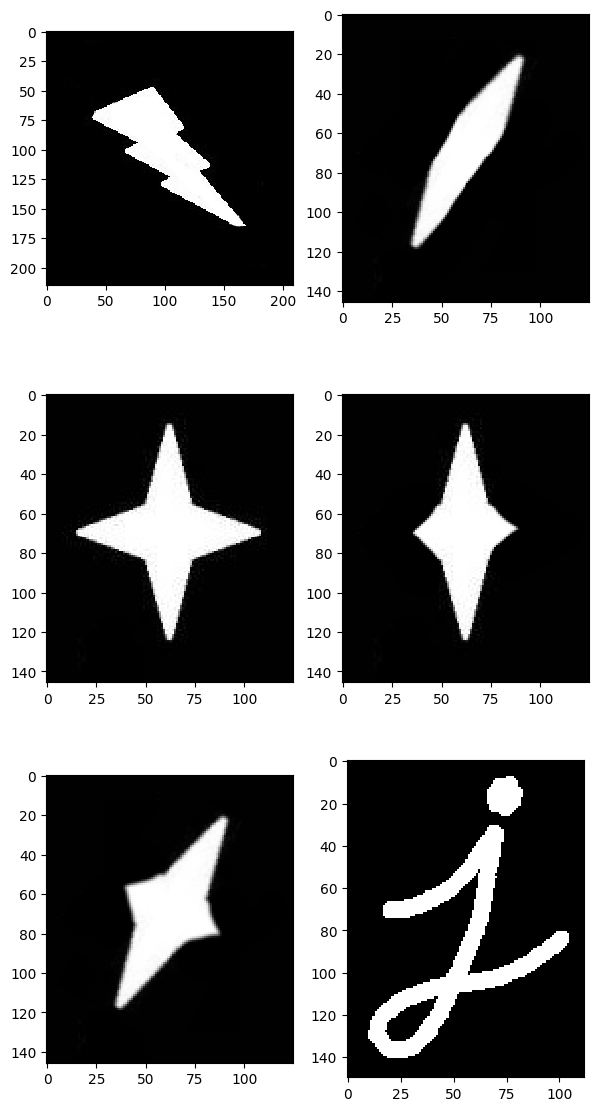

In [2]:
lightningbolt      = cv2.imread('shapes/lightningbolt.png', cv2.IMREAD_GRAYSCALE)
blob               = cv2.imread('shapes/blob.png', cv2.IMREAD_GRAYSCALE)
star               = cv2.imread('shapes/star.png', cv2.IMREAD_GRAYSCALE)
squishedstar       = cv2.imread('shapes/squishedstar.png', cv2.IMREAD_GRAYSCALE)
squishedturnedstar = cv2.imread('shapes/squishedturnedstar.png', cv2.IMREAD_GRAYSCALE)
letterj            = cv2.imread('shapes/letterj.png', cv2.IMREAD_GRAYSCALE)

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

fig,ax = plt.subplots(nrows=3, ncols=2)
for a,i in zip(ax.flatten(), images):
    a.imshow(i, cmap='gray', interpolation='none');
fig.set_size_inches(7,14);

In [3]:
intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

75


## Question:

What would you expect the value to be, visually? What explains the actual value?

In [4]:
# TODO
# 2, because it looks like there are only two intensity values--black and white. However, there are probably more grayscale values you can see if you zoom in.

## Thresholding

https://docs.opencv.org/3.4.1/d7/d4d/tutorial_py_thresholding.html

2


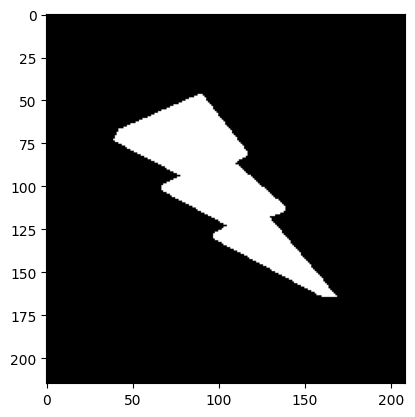

In [5]:
_, lightningbolt = cv2.threshold(lightningbolt,200,255,cv2.THRESH_BINARY)

intensity_values = set(lightningbolt.flatten())
print(len(intensity_values))

plt.imshow(lightningbolt, cmap='gray');

## Question
What happens when the above values are used for thresholding? What is a "good" value for thresholding the above images? Why?

In [40]:
## TODO
## All pixels that are greater than 200 are set to 255 (white), and all pixels that are less than or equal to 200 are set to 0 (black).
# A good value for thresholding depends on the image. 

# Exercises

**Steps**

1. Read each tutorial
    * Skim all parts of each tutorial to understand what each operation does
    * Focus on the part you will need for the requested transformation
2. Apply the transformation and visualize it

## 1. Blend lightningbolt and blob together
https://docs.opencv.org/3.4.1/d0/d86/tutorial_py_image_arithmetics.html

*Remember:* Don't use `imshow` from OpenCV, use `imshow` from `matplotlib`

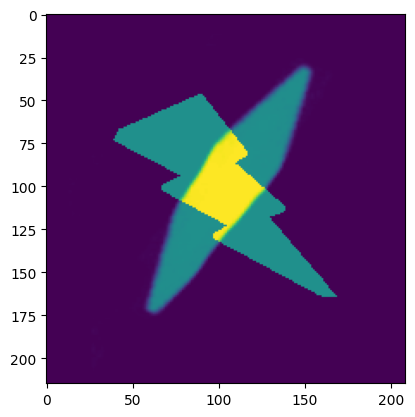

In [9]:
# 1. Blend
# TODO
blob_resized = cv2.resize(blob, (lightningbolt.shape[1], lightningbolt.shape[0]))
lightningbolt_blend = cv2.addWeighted(lightningbolt, 0.5, blob_resized, 0.5, 0)

plt.imshow(lightningbolt_blend);

## 2. Find a ROI which contains the point of the lightning bolt

https://docs.opencv.org/3.4.1/d3/df2/tutorial_py_basic_ops.html

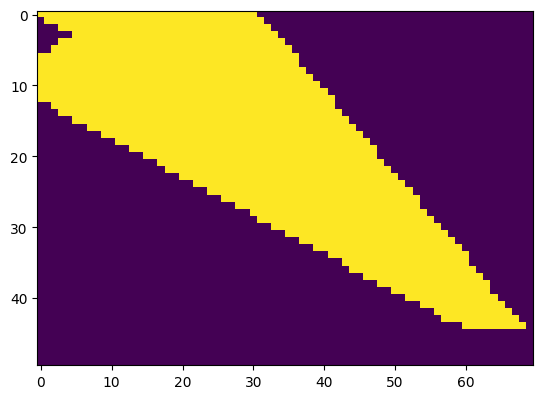

In [14]:
# 2. ROI
# TODO

lightningbolt_roi = lightningbolt[120:170, 100:170]
plt.imshow(lightningbolt_roi);

## 3. Use an averaging kernel on the letter j

https://docs.opencv.org/3.4.1/d4/d13/tutorial_py_filtering.html

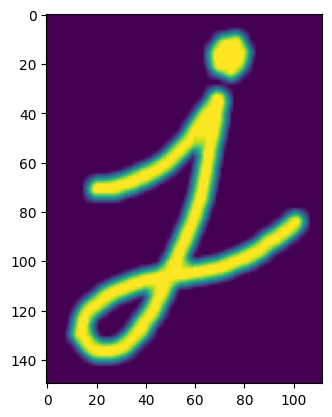

In [17]:
# 3. 
# TODO
letterj_averaged = cv2.blur(letterj, (5, 5))
plt.imshow(letterj_averaged);

# Morphology

https://docs.opencv.org/3.4.1/d9/d61/tutorial_py_morphological_ops.html

## 4. Perform erosion on j with a 3x3 kernel

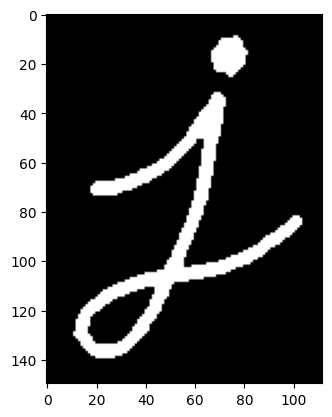

In [20]:
# 4
# TODO
kernel = np.ones((3,3),np.uint8);
erosion_3x3 = cv2.erode(letterj,kernel,iterations = 1)
plt.imshow(erosion_3x3, cmap='gray');

## 5. Perform erosion on j with a 5x5 kernel

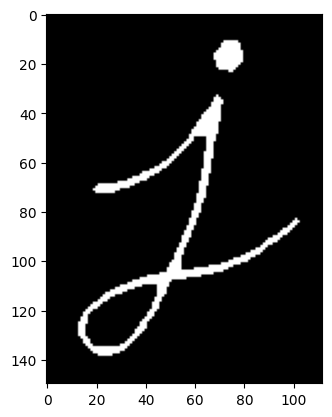

In [21]:
# 5
# TODO
kernel = np.ones((5,5),np.uint8);
erosion_5x5 = cv2.erode(letterj,kernel,iterations = 1)
plt.imshow(erosion_5x5, cmap='gray');

## 6. Perform erosion on j with __two__ iterations, using a kernel size of your choice

Hint: look at the OpenCV API documentation. It is possible to perform two iterations of erosion in one line of Python!

https://docs.opencv.org/3.4.1/d4/d86/group__imgproc__filter.html#gaeb1e0c1033e3f6b891a25d0511362aeb



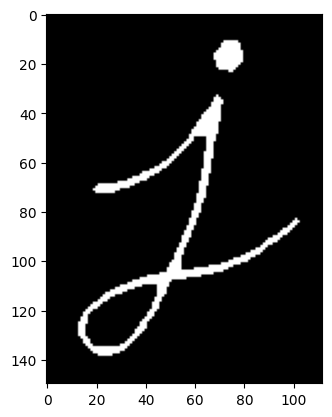

In [ ]:
# 6
# TODO
kernel = np.ones((3,3),np.uint8);
erosion_3x3_x2 = cv2.erode(letterj,kernel,iterations = 2)
plt.imshow(erosion_3x3_x2, cmap='gray');

## 7. Perform dilation on j with a 3x3 kernel

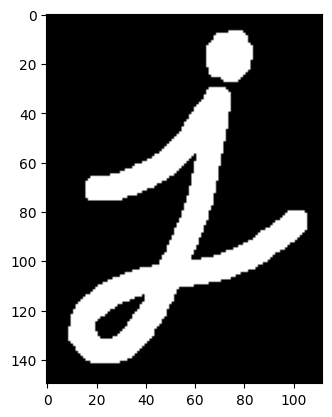

In [23]:
# 7
# TODO
kernel = np.ones((3,3),np.uint8);
dilation_3x3 = cv2.dilate(letterj,kernel,iterations = 1)
plt.imshow(dilation_3x3, cmap='gray');

## 8. Perform dilation on j with a 5x5 kernel

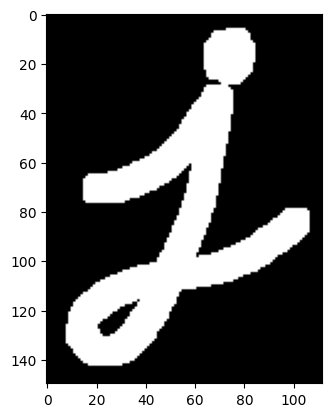

In [24]:
# 8
# TODO
kernel = np.ones((5,5),np.uint8);
dilation_5x5 = cv2.dilate(letterj,kernel,iterations = 1)
plt.imshow(dilation_5x5, cmap='gray');

## 9. What is the effect of kernel size on morphology operations?

In [49]:
# 9
# A larger kernel increases the amount of pixels considered as it "slides", which can lead to more pronounced dilation/erosion effects.

## 10. What is the difference betweeen repeated iterations of a morphology operation with a small kernel, versus a single iteration with a large kernel?

In [50]:
# 10
# Visually, repeated iterations with a small kernel look somewhat similar to a single iteration with a larger kernel, but the repeated iterations are generally more gradual and can preserve more detail in the image.

## 11. Rotate the lightningbolt and star by 90 degrees

https://docs.opencv.org/3.4.1/da/d6e/tutorial_py_geometric_transformations.html

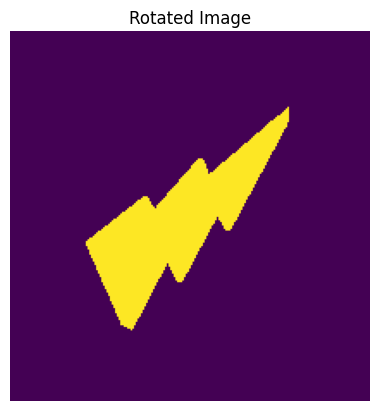

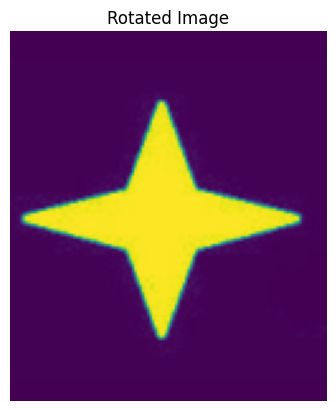

In [28]:
rows, cols = lightningbolt.shape[:2]
M = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
dst = cv2.warpAffine(lightningbolt, M, (cols, rows))

plt.imshow(dst)
plt.title('Rotated Image')
plt.axis('off')
plt.show()

rows2, cols2 = star.shape[:2]
M2 = cv2.getRotationMatrix2D((cols2 / 2, rows2 / 2), 90, 1)
dst2 = cv2.warpAffine(star, M2, (cols2, rows2))

plt.imshow(dst2)
plt.title('Rotated Image')
plt.axis('off')
plt.show()

## 12. STRETCH GOAL: 

Visualize the result of Laplacian, Sobel X, and Sobel Y on all of the images. Also, produce a combined image of both Sobel X and Sobel Y for each image. Is Exercise 1 the best way to do this? Are there other options? 

You should have 4 outputs (Laplacian, SobelX, SobelY, and the combination) for each input image visualized at the end.

https://docs.opencv.org/3.4.1/d5/d0f/tutorial_py_gradients.html

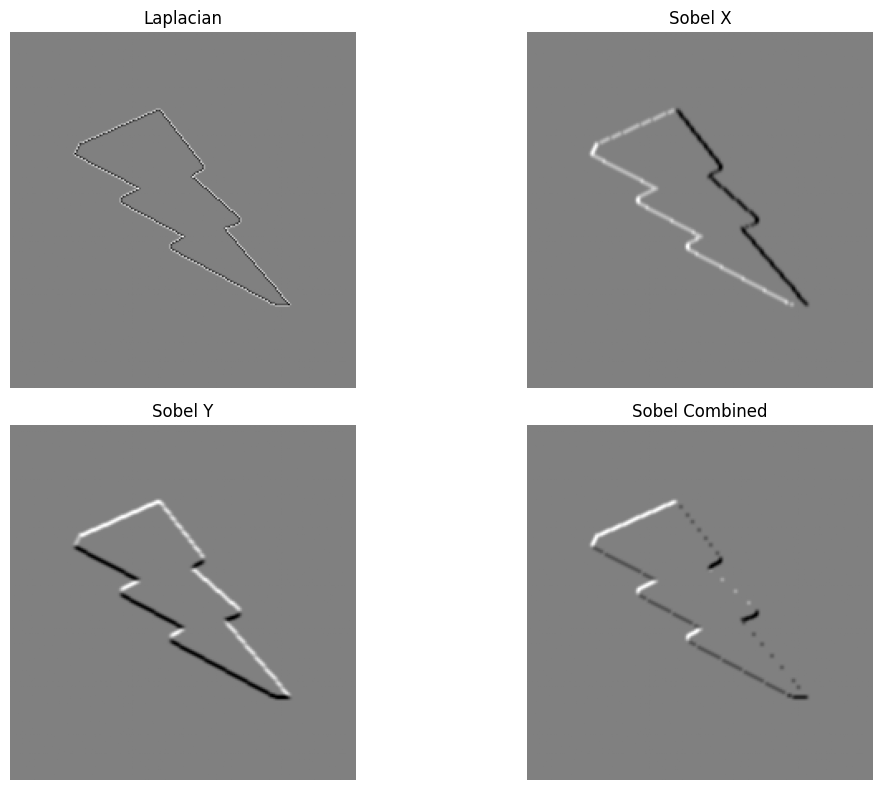

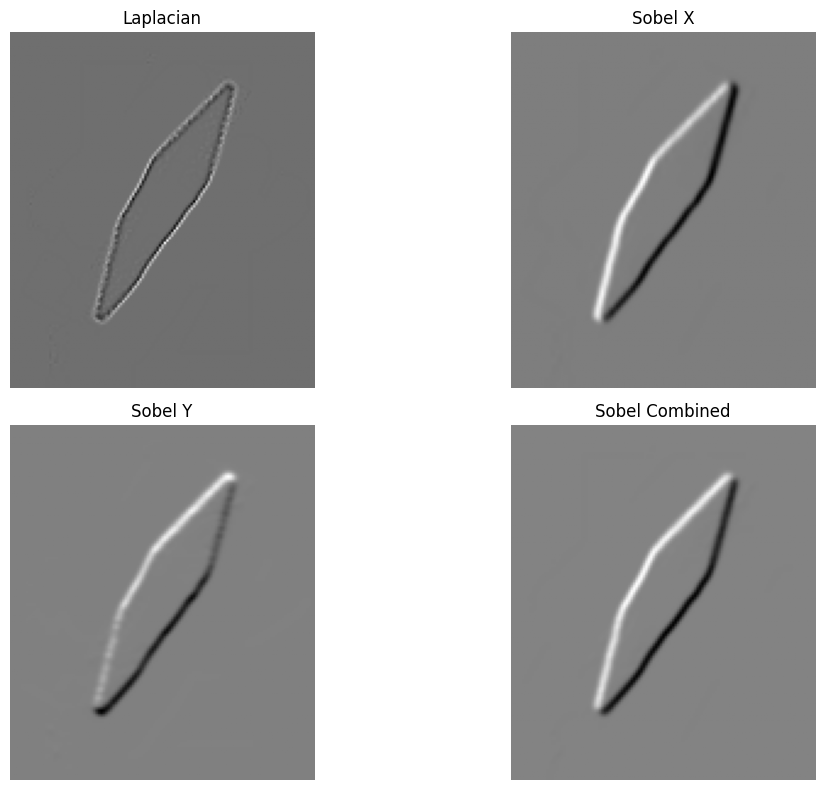

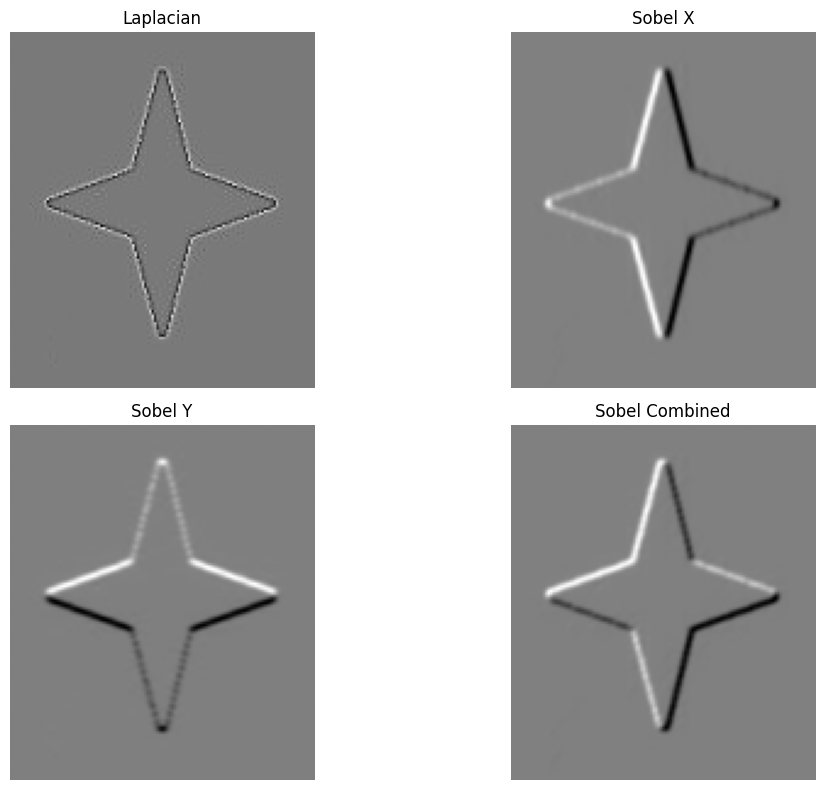

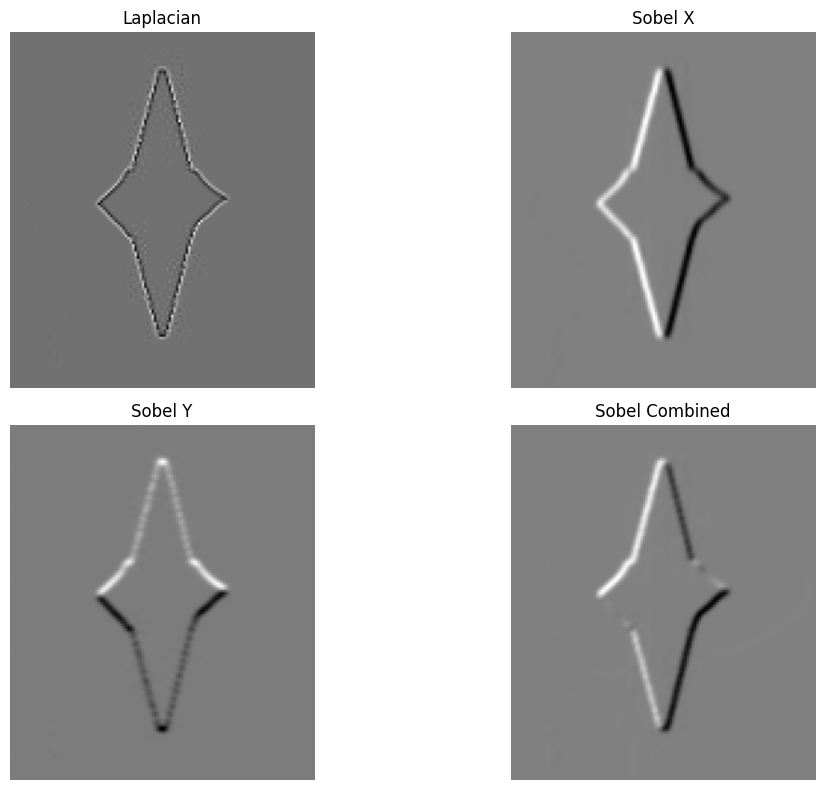

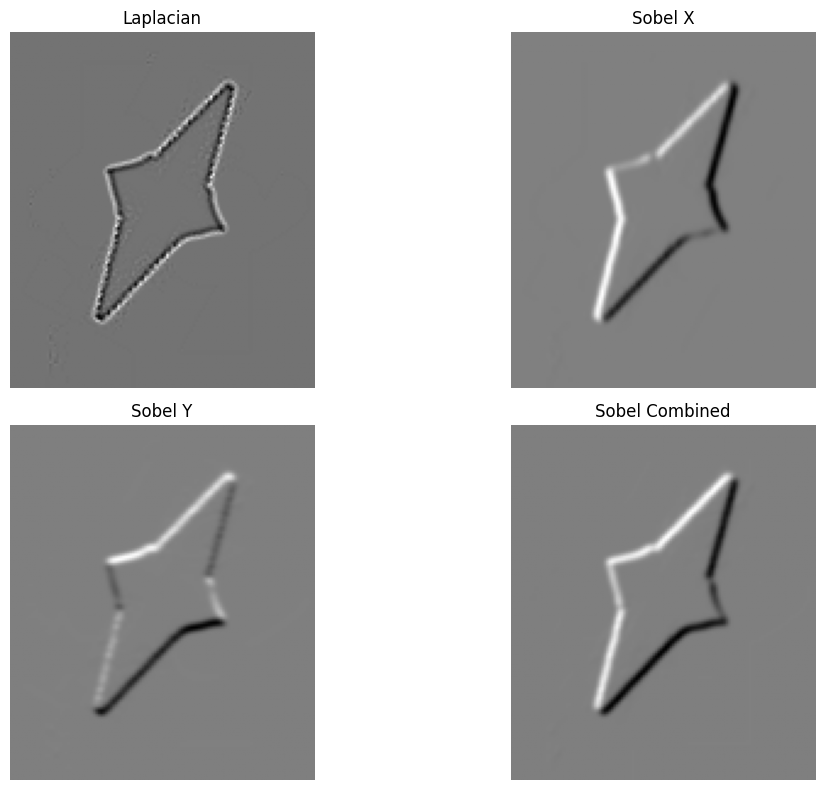

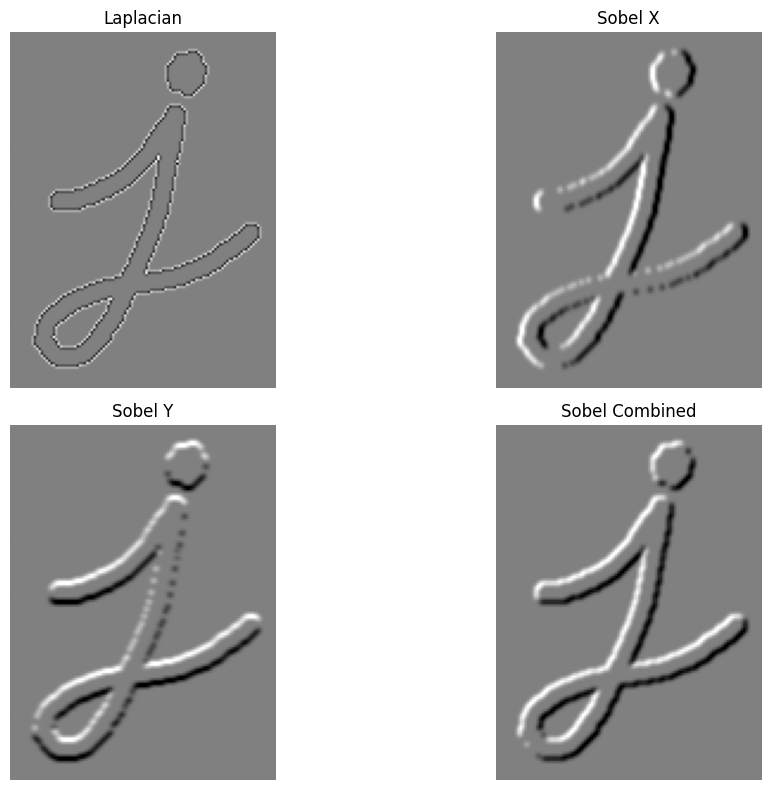

In [35]:
# TODO

def apply_edge_detection(img):
    laplacian = cv2.Laplacian(img, cv2.CV_64F)
    
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=5)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=5)
    
    sobel_combined = sobelx+sobely
    
    return laplacian, sobelx, sobely, sobel_combined

images = [lightningbolt, blob, star, squishedstar, squishedturnedstar, letterj]

for img in (images):
    laplacian, sobelx, sobely, sobel_combined = apply_edge_detection(img)
    
    fig, axes = plt.subplots(2, 2, figsize=(12,8))
    
    axes[0,0].imshow(laplacian, cmap='gray')
    axes[0,0].set_title('Laplacian')
    axes[0,0].axis('off')
    
    axes[0,1].imshow(sobelx, cmap='gray')
    axes[0,1].set_title('Sobel X') 
    axes[0,1].axis('off')
    
    axes[1,0].imshow(sobely, cmap='gray')
    axes[1,0].set_title('Sobel Y')
    axes[1,0].axis('off')
    
    axes[1,1].imshow(sobel_combined, cmap='gray')
    axes[1,1].set_title('Sobel Combined')
    axes[1,1].axis('off')
    
    plt.tight_layout()
    plt.show()

## When you are done:

You should have one or more images for each exercise.

1. Double-check that you filled in your name at the top of the notebook!
2. Click `File` -> `Export Notebook As` -> `PDF`
3. Email the PDF to `YOURTEAMNAME@beaver.works` 